# Estudio de los logs de flexlm  y el uso de licencias de los diferentes productos



Autor: Jose Antonio Vilar. 07/2022 (joseantonio.vilar@upm.es)

Con este notebook se pretende realizar __un primer estudio exploratorio__ de los datos que genera flexlm en los ficheros logs.
Se ha escrito un programa en pyhton que extrea la informacion relevante para el estudio del log 
Devuelve un datafame con la siguiente información: fecha, hora, sever, producto, complemento, accion, usuario y host.
Los datos extraidos pueden aportar información del uso de licencias de matlab, maple, autodesk, arcgis.

## Leemos los diferentes logs 

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
%cd ../python
from flexlm_log import flexlm_log_leer
df_datos_autodesk = flexlm_log_leer("../data_raw/autodesk.log", "autodesk")
df_datos_autodesk.head(10)


c:\Users\josevilar\Documents\Proyectos\Stats_Logs_FlexLM\python


,Fecha,Hora,Server,Producto,Accion,Modulo,Usuario,Host
0,05/05/2022,8:42:45,flexlm02,autodesk,OUT,64801INVPROSA_F,UPM,upm00243
1,05/05/2022,8:42:45,flexlm02,autodesk,OUT,87537INVPROSA_2022_0F,UPM,upm00243
2,05/05/2022,8:43:12,flexlm02,autodesk,OUT,64801INVPROSA_F,upm,etsidi00059
3,05/05/2022,8:43:12,flexlm02,autodesk,OUT,87537INVPROSA_2022_0F,upm,etsidi00059
4,05/05/2022,8:44:36,flexlm02,autodesk,OUT,64300ACD_F,UPM,upm00265
5,05/05/2022,8:44:36,flexlm02,autodesk,OUT,87545ACD_2022_0F,UPM,upm00265
6,05/05/2022,8:44:48,flexlm02,autodesk,IN,87545ACD_2022_0F,UPM,upm00265
7,05/05/2022,8:44:48,flexlm02,autodesk,IN,64300ACD_F,UPM,upm00265
8,05/05/2022,10:01:09,flexlm02,autodesk,OUT,64801INVPROSA_F,upm,etsidi00062
9,05/05/2022,10:01:09,flexlm02,autodesk,OUT,87537INVPROSA_2022_0F,upm,etsidi00062


In [5]:
df_datos_maple= flexlm_log_leer("../data_raw/maple.log", "maple")
df_datos_maple.head(10)

,Fecha,Hora,Server,Producto,Accion,Modulo,Usuario,Host
0,10/06/2022,9:19:00,flexlm01,maple,OUT,Maple,Usuario,PC3456367
1,10/06/2022,9:19:00,flexlm01,maple,OUT,Maple2019,Usuario,PC3456367
2,10/06/2022,9:19:49,flexlm01,maple,OUT,Maple,Usuario,PC3456367
3,10/06/2022,9:19:49,flexlm01,maple,OUT,Maple2019,Usuario,PC3456367
4,10/06/2022,11:19:10,flexlm01,maple,IN,Maple,Usuario,PC3456367
5,10/06/2022,11:19:10,flexlm01,maple,IN,Maple2019,Usuario,PC3456367
6,10/06/2022,11:19:59,flexlm01,maple,IN,Maple,Usuario,PC3456367
7,10/06/2022,11:19:59,flexlm01,maple,IN,Maple2019,Usuario,PC3456367
8,11/06/2022,15:04:33,flexlm01,maple,OUT,Maple,UPM,upm00128
9,11/06/2022,15:04:33,flexlm01,maple,OUT,Maple2021,UPM,upm00128


In [6]:
df_datos_matlab= flexlm_log_leer("../data_raw/matlab.log", "matlab")
df_datos_matlab.head(10)

,Fecha,Hora,Server,Producto,Accion,Modulo,Usuario,Host
0,09/06/2022,10:25:38,flexlm01,matlab,OUT,MATLAB,UPM,upm00183
1,09/06/2022,10:25:38,flexlm01,matlab,OUT,MATLAB,lopezrmo,CC12
2,09/06/2022,10:25:41,flexlm01,matlab,OUT,MATLAB,Javier,DESKTOP-PV69PK5
3,09/06/2022,10:29:13,flexlm01,matlab,OUT,MATLAB,SATCOM1,SATCOM-02
4,09/06/2022,10:29:20,flexlm01,matlab,OUT,MATLAB,felicia,DESKTOP-L00QHGH
5,09/06/2022,10:29:20,flexlm01,matlab,OUT,Statistics_Toolbox,felicia,DESKTOP-L00QHGH
6,09/06/2022,10:29:20,flexlm01,matlab,OUT,MAP_Toolbox,felicia,DESKTOP-L00QHGH
7,09/06/2022,10:30:34,flexlm01,matlab,OUT,MATLAB,usuario,DESKTOP-M3TQDQ0
8,09/06/2022,10:30:34,flexlm01,matlab,OUT,SIMULINK,usuario,DESKTOP-M3TQDQ0
9,09/06/2022,10:30:55,flexlm01,matlab,OUT,MATLAB,cristian,cristian-PC


In [8]:
#Combinamos las dataframe
import pandas as pd
datos = [df_datos_autodesk,df_datos_matlab,df_datos_maple]
df_datos = pd.concat(datos, ignore_index=True)

In [9]:
df_datos.head(5)

,Fecha,Hora,Server,Producto,Accion,Modulo,Usuario,Host
0,05/05/2022,8:42:45,flexlm02,autodesk,OUT,64801INVPROSA_F,UPM,upm00243
1,05/05/2022,8:42:45,flexlm02,autodesk,OUT,87537INVPROSA_2022_0F,UPM,upm00243
2,05/05/2022,8:43:12,flexlm02,autodesk,OUT,64801INVPROSA_F,upm,etsidi00059
3,05/05/2022,8:43:12,flexlm02,autodesk,OUT,87537INVPROSA_2022_0F,upm,etsidi00059
4,05/05/2022,8:44:36,flexlm02,autodesk,OUT,64300ACD_F,UPM,upm00265


In [10]:
df_datos.tail(5)

,Fecha,Hora,Server,Producto,Accion,Modulo,Usuario,Host
35055,05/07/2022,15:53:38,flexlm01,maple,IN,Maple2021,luquelj,CC24
35056,05/07/2022,18:01:32,flexlm01,maple,OUT,Maple,luquelj,CC04
35057,05/07/2022,18:01:32,flexlm01,maple,OUT,Maple2021,luquelj,CC04
35058,05/07/2022,20:01:42,flexlm01,maple,IN,Maple,luquelj,CC04
35059,05/07/2022,20:01:42,flexlm01,maple,IN,Maple2021,luquelj,CC04


In [11]:
#Convertimos al formato datatime
datetime_df =  pd.to_datetime(df_datos.Fecha.astype(str) + ' ' + df_datos.Hora.astype(str))
df_datos.insert(2, 'Datetime', datetime_df)

In [12]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35060 entries, 0 to 35059
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     35060 non-null  object        
 1   Hora      35060 non-null  object        
 2   Datetime  35060 non-null  datetime64[ns]
 3   Server    35060 non-null  object        
 4   Producto  35060 non-null  object        
 5   Accion    35060 non-null  object        
 6   Modulo    35060 non-null  object        
 7   Usuario   35060 non-null  object        
 8   Host      35060 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 2.4+ MB


In [13]:
#Guardamos el dataframe en un ficehero csv
from pathlib import Path  
filepath = Path('../csv/flexlm_log.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True) 
df_datos.to_csv(filepath)

In [14]:
#Tipo de los datos del dataframe

df_datos = pd.read_csv('../csv/flexlm_log.csv', index_col= 0)
df_datos.head(5)

,Fecha,Hora,Datetime,Server,Producto,Accion,Modulo,Usuario,Host
0,05/05/2022,8:42:45,2022-05-05 08:42:45,flexlm02,autodesk,OUT,64801INVPROSA_F,UPM,upm00243
1,05/05/2022,8:42:45,2022-05-05 08:42:45,flexlm02,autodesk,OUT,87537INVPROSA_2022_0F,UPM,upm00243
2,05/05/2022,8:43:12,2022-05-05 08:43:12,flexlm02,autodesk,OUT,64801INVPROSA_F,upm,etsidi00059
3,05/05/2022,8:43:12,2022-05-05 08:43:12,flexlm02,autodesk,OUT,87537INVPROSA_2022_0F,upm,etsidi00059
4,05/05/2022,8:44:36,2022-05-05 08:44:36,flexlm02,autodesk,OUT,64300ACD_F,UPM,upm00265


In [15]:
df_datos['Datetime'] = pd.to_datetime(df_datos.Datetime.astype(str), format = '%Y-%m-%d %H:%M:%S')

df_datos = df_datos.set_index('Datetime')

#df_datos = df_datos.drop(['Fecha','Hora'], axis=1)

In [16]:
#Convertimos la fechas y hora
df_datos['Fecha'] = pd.to_datetime(df_datos['Fecha'], infer_datetime_format=True, errors='ignore' , format='%d/%m/%Y')


In [17]:
df_datos.shape

(35060, 8)

In [18]:
df_datos.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35060 entries, 2022-05-05 08:42:45 to 2022-05-07 20:01:42
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     35060 non-null  datetime64[ns]
 1   Hora      35060 non-null  object        
 2   Server    35060 non-null  object        
 3   Producto  35060 non-null  object        
 4   Accion    35060 non-null  object        
 5   Modulo    35060 non-null  object        
 6   Usuario   35060 non-null  object        
 7   Host      35060 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 2.4+ MB


In [19]:
print("Licencias OUT/Server")
df_datos_out = df_datos[df_datos["Accion"] == "OUT"],
print(df_datos_out.groupby("Server")["Accion"].count())
print("Total hosts utlizando los servidores {}".format(len(df_datos_out["Host"].unique())))


Licencias OUT/Server
Server
flexlm01    10112
flexlm02     7446
Name: Accion, dtype: int64
Total hosts utlizando los servidores 1069


## Autodesk

In [20]:
autodesk = df_datos[df_datos['Producto'] == "autodesk"]

In [21]:
autodesk.head(5)

,Fecha,Hora,Server,Producto,Accion,Modulo,Usuario,Host
Datetime,,,,,,,,
2022-05-05 08:42:45,2022-05-05,8:42:45,flexlm02,autodesk,OUT,64801INVPROSA_F,UPM,upm00243
2022-05-05 08:42:45,2022-05-05,8:42:45,flexlm02,autodesk,OUT,87537INVPROSA_2022_0F,UPM,upm00243
2022-05-05 08:43:12,2022-05-05,8:43:12,flexlm02,autodesk,OUT,64801INVPROSA_F,upm,etsidi00059
2022-05-05 08:43:12,2022-05-05,8:43:12,flexlm02,autodesk,OUT,87537INVPROSA_2022_0F,upm,etsidi00059
2022-05-05 08:44:36,2022-05-05,8:44:36,flexlm02,autodesk,OUT,64300ACD_F,UPM,upm00265


In [22]:
autodesk.tail(5)

,Fecha,Hora,Server,Producto,Accion,Modulo,Usuario,Host
Datetime,,,,,,,,
2022-07-07 11:14:00,2022-07-07,11:14:00,flexlm02,autodesk,IN,662003DSMAX_F,ssii,ADI1-01
2022-07-07 11:48:15,2022-07-07,11:48:15,flexlm02,autodesk,OUT,662003DSMAX_F,ssii,ADI1-01
2022-07-07 11:48:15,2022-07-07,11:48:15,flexlm02,autodesk,OUT,872423DSMAX_2020_0F,ssii,ADI1-01
2022-07-07 11:49:02,2022-07-07,11:49:02,flexlm02,autodesk,IN,872423DSMAX_2020_0F,ssii,ADI1-01
2022-07-07 11:49:02,2022-07-07,11:49:02,flexlm02,autodesk,IN,662003DSMAX_F,ssii,ADI1-01


In [23]:
autodesk['Modulo'].unique()


array(['64801INVPROSA_F', '87537INVPROSA_2022_0F', '64300ACD_F',
       '87545ACD_2022_0F', '64900CIV3D_F', '87556CIV3D_2022_0F',
       '85950RVT_F', '87561RVT_2022_0F', '87577INHSMP_2022_0F',
       '662003DSMAX_F', '875683DSMAX_2022_0F', '67600NAVMAN_F',
       '87566NAVMAN_2022_0F', '87084ACD_2019_0F', '87393ACD_2021_0F',
       '87676ACD_2023_0F', '87235INVPROSA_2020_0F', '872423DSMAX_2020_0F'],
      dtype=object)

In [24]:

print("Fecha inicio: {}".format(autodesk['Fecha'].min()))
print("Fecha fin: {}".format(autodesk['Fecha'].max()))
print("Dias del log: {}".format(autodesk['Fecha'].max() - autodesk['Fecha'].min()))


Fecha inicio: 2022-05-05 00:00:00
Fecha fin: 2022-07-07 00:00:00
Dias del log: 63 days 00:00:00


In [25]:
#Licencias utilizadas (OUT)
autodesk_licencias = autodesk[autodesk['Accion'] == "OUT"]
print("Suma licencia (out): {}".format(sum(autodesk_licencias.groupby('Modulo')['Accion'].count())))
print(autodesk_licencias.groupby('Modulo')['Accion'].count().sort_values())


Suma licencia (out): 7446
Modulo
87235INVPROSA_2020_0F       1
872423DSMAX_2020_0F         2
87084ACD_2019_0F            2
87676ACD_2023_0F            2
67600NAVMAN_F               3
87566NAVMAN_2022_0F         3
875683DSMAX_2022_0F        12
662003DSMAX_F              14
85950RVT_F                 67
87561RVT_2022_0F           67
64900CIV3D_F              165
87556CIV3D_2022_0F        165
87577INHSMP_2022_0F       698
87393ACD_2021_0F          714
87545ACD_2022_0F          778
64300ACD_F               1496
87537INVPROSA_2022_0F    1628
64801INVPROSA_F          1629
Name: Accion, dtype: int64


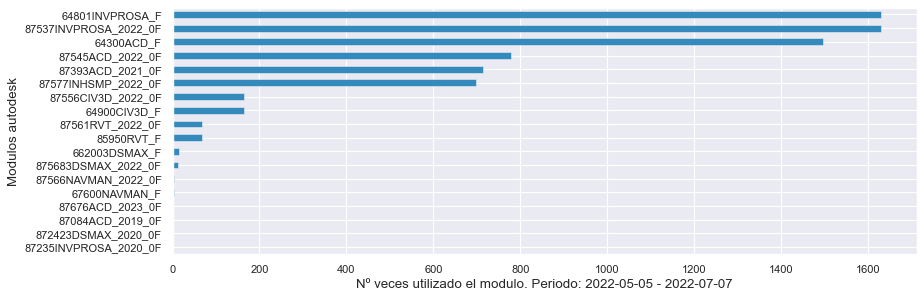

In [26]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(12, 4), dpi=80)
plt.style.use('bmh')
autodesk_licencias.groupby('Modulo')['Accion'].count().sort_values().plot(kind="barh", fontsize=10)
plt.xlabel("Nº veces utilizado el modulo. Periodo: 2022-05-05 - 2022-07-07");  
plt.ylabel("Modulos autodesk");

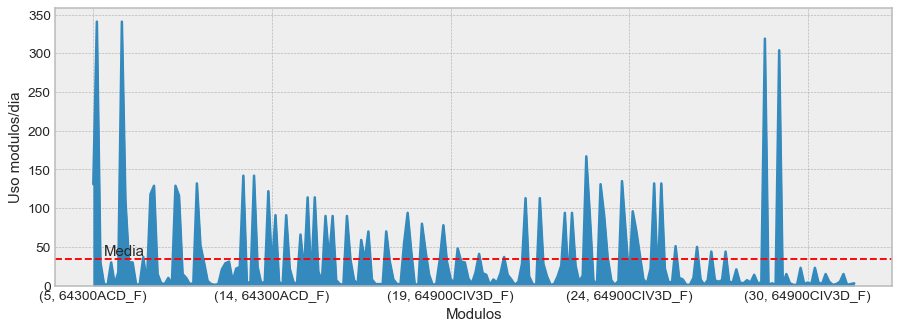

In [27]:
fig, axs = plt.subplots(figsize=(12, 4), dpi=90)
plt.style.use('bmh')
autodesk_licencias.groupby([autodesk_licencias.index.day,"Modulo"])["Accion"].count().plot.area()
plt.text(3,39,'Media',rotation=360)
plt.axhline(y=autodesk_licencias.groupby([autodesk_licencias.index.day,"Modulo"])["Accion"].count().mean(), color='red', ls='--', lw=1.5)
plt.xlabel("Modulos");  
plt.ylabel("Uso modulos/dia");

In [28]:
#Hosts utilizando autodesk
print( "Total host unicos: {}".format(len(autodesk['Host'].unique())))
print( "Hosts: {}".format(autodesk['Host'].unique()))


Total host unicos: 730
Hosts: ['upm00243' 'etsidi00059' 'upm00265' 'etsidi00062' 'etsidi00064'
 'upm00314' 'upm00360' 'upm00383' 'upm00001' 'upm00086' 'etsidi00108'
 'etsidi00002' 'upm00000' 'upm00014' 'upm00020' 'upm00028' 'upm00034'
 'upm00050' 'upm00059' 'etsidi00005' 'upm00208' 'upm00295' 'upm00391'
 'etsidi00019' 'etsidi00020' 'upm00393' 'etsidi00022' 'upm00401'
 'etsidi00024' 'upm00404' 'etsidi00025' 'upm00406' 'upm00440'
 'etsidi00028' 'etsidi00031' 'etsidi00033' 'upm00068' 'upm00260'
 'upm00267' 'upm00461' 'etsidi00040' 'upm00472' 'etsidi00045'
 'etsidi00048' 'upm00090' 'upm00094' 'upm00182' 'etsidi00003'
 'etsidi00000' 'etsidi00007' 'upm00041' 'etsidi00009' 'etsidi00010'
 'etsidi00012' 'etsidi00014' 'etsidi00011' 'upm00154' 'upm00350'
 'etsidi00021' 'upm00518' 'etsidi00023' 'upm00669' 'upm00779' 'upm00849'
 'upm00997' 'upm00152' 'upm01136' 'upm01138' 'etsidi00037' 'etsidi00006'
 'upm00031' 'upm00077' 'upm00591' 'upm00594' 'upm00017' 'upm00003'
 'upm00012' 'upm00024' 'upm00029'

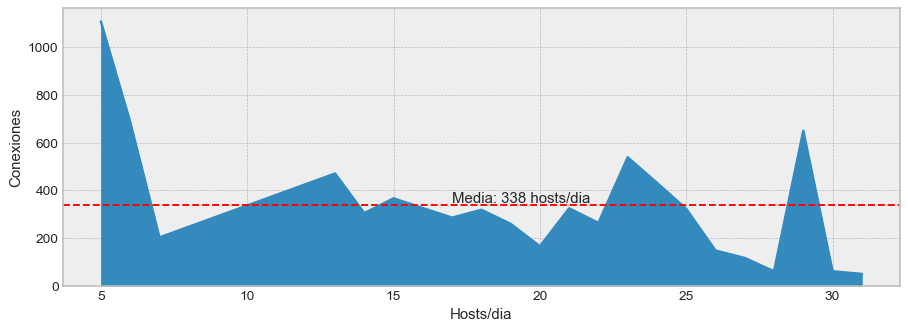

In [29]:
fig, axs = plt.subplots(figsize=(12, 4), dpi=90)
plt.style.use('bmh')
autodesk_licencias.groupby([autodesk_licencias.index.day])["Host"].count().plot(kind="area")
plt.text(17,350,'Media: 338 hosts/dia',rotation=360)
plt.axhline(y=autodesk_licencias.groupby([autodesk_licencias.index.day])["Host"].count().mean(), color='red', ls='--', lw=1.5, label="Media conexiones por dia")
plt.xlabel("Hosts/dia");  
plt.ylabel("Conexiones");

In [31]:
autodesk_licencias["Host"].groupby(autodesk_licencias.index.day).count()

Datetime
5     1107
6      686
7      202
13     470
14     304
15     366
16     325
17     285
18     318
19     259
20     165
21     324
22     263
23     538
24     431
25     322
26     147
27     116
28      60
29     649
30      60
31      49
Name: Host, dtype: int64

In [32]:
autodesk_licencias.groupby([autodesk_licencias.index.weekday, "Modulo"])["Accion"].count()

Datetime  Modulo             
0         64300ACD_F             225
          64801INVPROSA_F        393
          64900CIV3D_F            33
          662003DSMAX_F            2
          85950RVT_F              25
                                ... 
6         87556CIV3D_2022_0F      18
          87561RVT_2022_0F         9
          87566NAVMAN_2022_0F      1
          875683DSMAX_2022_0F      1
          87577INHSMP_2022_0F    156
Name: Accion, Length: 89, dtype: int64

## Matlab

In [33]:
matlab = df_datos[df_datos['Producto'] == "matlab"]

In [34]:
matlab.head(5)


,Fecha,Hora,Server,Producto,Accion,Modulo,Usuario,Host
Datetime,,,,,,,,
2022-09-06 10:25:38,2022-06-09,10:25:38,flexlm01,matlab,OUT,MATLAB,UPM,upm00183
2022-09-06 10:25:38,2022-06-09,10:25:38,flexlm01,matlab,OUT,MATLAB,lopezrmo,CC12
2022-09-06 10:25:41,2022-06-09,10:25:41,flexlm01,matlab,OUT,MATLAB,Javier,DESKTOP-PV69PK5
2022-09-06 10:29:13,2022-06-09,10:29:13,flexlm01,matlab,OUT,MATLAB,SATCOM1,SATCOM-02
2022-09-06 10:29:20,2022-06-09,10:29:20,flexlm01,matlab,OUT,MATLAB,felicia,DESKTOP-L00QHGH


In [35]:
matlab.tail(5)

,Fecha,Hora,Server,Producto,Accion,Modulo,Usuario,Host
Datetime,,,,,,,,
2022-07-07 08:14:44,2022-07-07,8:14:44,flexlm01,matlab,IN,Statistics_Toolbox,s422722,r1n20.hpc.lan
2022-07-07 08:14:44,2022-07-07,8:14:44,flexlm01,matlab,IN,Statistics_Toolbox,s422722,r1n11.hpc.lan
2022-07-07 08:14:44,2022-07-07,8:14:44,flexlm01,matlab,IN,Statistics_Toolbox,s422722,r1n5.hpc.lan
2022-07-07 08:14:44,2022-07-07,8:14:44,flexlm01,matlab,IN,Statistics_Toolbox,s422722,r1n18.hpc.lan
2022-07-07 08:14:44,2022-07-07,8:14:44,flexlm01,matlab,IN,Statistics_Toolbox,s422722,r1n19.hpc.lan


In [36]:
matlab['Modulo'].unique()

array(['MATLAB', 'Statistics_Toolbox', 'MAP_Toolbox', 'SIMULINK',
       'Distrib_Computing_Toolbox', 'Image_Toolbox', 'Signal_Toolbox',
       'PDE_Toolbox', 'Curve_Fitting_Toolbox', 'Simscape',
       'Power_System_Blocks', 'SimDriveline', 'Fixed_Point_Toolbox',
       'Signal_Blocks', 'Filter_Design_HDL_Coder', 'Audio_System_Toolbox',
       'Control_Toolbox', 'Simulink_Control_Design',
       'Phased_Array_System_Toolbox', 'Real-Time_Win_Target',
       'MATLAB_Coder', 'Real-Time_Workshop', 'Symbolic_Toolbox',
       'Communication_Toolbox', 'MATLAB_5G_Toolbox', 'Wavelet_Toolbox',
       'MPC_Toolbox', 'RF_Blockset', 'RF_Toolbox', 'Aerospace_Blockset',
       'Fuzzy_Toolbox', 'MBC_Toolbox', 'Neural_Network_Toolbox',
       'Optimization_Toolbox', 'GADS_Toolbox'], dtype=object)

In [37]:
#Licencias utilizadas (OUT)
print(matlab['Fecha'].min())
print(matlab['Fecha'].max())
matlab_licencias = matlab[matlab['Accion'] == "OUT"]
print("Suma licencia (out): {}".format(sum(matlab_licencias.groupby('Modulo')['Accion'].count())))
print(matlab_licencias.groupby('Modulo')['Accion'].count().sort_values())

2022-06-09 00:00:00
2022-07-07 00:00:00
Suma licencia (out): 9870
Modulo
Wavelet_Toolbox                   1
Simulink_Control_Design           1
SimDriveline                      1
MBC_Toolbox                       1
GADS_Toolbox                      1
Fuzzy_Toolbox                     1
Aerospace_Blockset                2
Filter_Design_HDL_Coder           2
Fixed_Point_Toolbox               3
Audio_System_Toolbox              3
MPC_Toolbox                       3
Real-Time_Workshop                4
Real-Time_Win_Target              4
RF_Toolbox                        4
RF_Blockset                       4
Neural_Network_Toolbox            4
MATLAB_Coder                      5
MATLAB_5G_Toolbox                 9
Communication_Toolbox            11
Phased_Array_System_Toolbox      13
PDE_Toolbox                      15
Power_System_Blocks              16
Simscape                         16
Curve_Fitting_Toolbox            18
Control_Toolbox                  19
MAP_Toolbox                

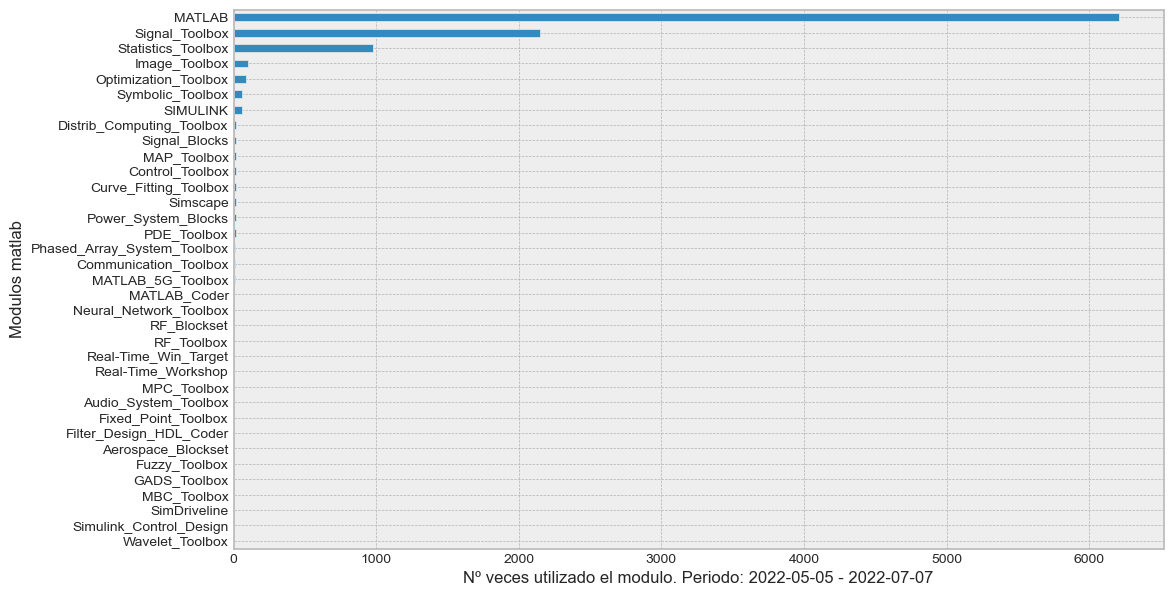

In [38]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(12, 7), dpi=100)
plt.style.use('bmh')
matlab_licencias.groupby('Modulo')['Accion'].count().sort_values().plot(kind="barh", fontsize=10)
plt.xlabel("Nº veces utilizado el modulo. Periodo: 2022-05-05 - 2022-07-07");  
plt.ylabel("Modulos matlab");

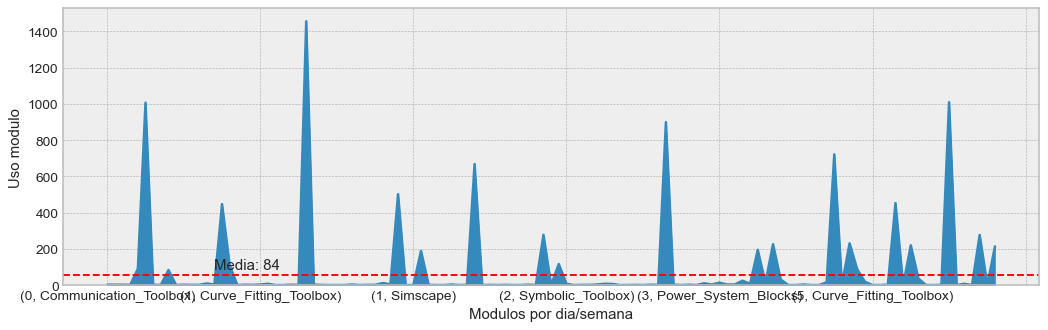

In [39]:
fig, axs = plt.subplots(figsize=(14, 4), dpi=90)
plt.style.use('bmh')
matlab_licencias.groupby([matlab_licencias.index.weekday, "Modulo"])["Accion"].count().plot(kind='area')
plt.text(14,90,'Media: 84',rotation=360)
plt.axhline(y=matlab_licencias.groupby([matlab_licencias.index.day,"Modulo"])["Accion"].count().mean(), color='red', ls='--', lw=1.5)
plt.xlabel("Modulos por dia/semana");  
plt.ylabel("Uso modulo");

In [40]:
#Hosts utilizando
print(matlab['Fecha'].min())
print(matlab['Fecha'].max())
print( "Total host unicos: {}".format(len(matlab['Host'].unique())))
print( "Hosts: {}".format(matlab['Host'].unique()))

2022-06-09 00:00:00
2022-07-07 00:00:00
Total host unicos: 406
Hosts: ['upm00183' 'CC12' 'DESKTOP-PV69PK5' 'SATCOM-02' 'DESKTOP-L00QHGH'
 'DESKTOP-M3TQDQ0' 'cristian-PC' 'DESKTOP-NCFGU88' 'DESKTOP-7OJ3SAB'
 'r1n61.hpc.lan' 'r1n72.hpc.lan' 'r1n1.hpc.lan' 'r1n2.hpc.lan'
 'r1n3.hpc.lan' 'upm00229' 'r1n11.hpc.lan' 'DESKTOP-U5CVESQ'
 'r1n47.hpc.lan' 'upm00340' 'upm00344' 'CC20' 'upm00415' 'ccsup12'
 'upm00447' 'r1n5.hpc.lan' 'r1n6.hpc.lan' 'r1n7.hpc.lan' 'r1n8.hpc.lan'
 'r1n9.hpc.lan' 'r1n15.hpc.lan' 'r1n18.hpc.lan' 'r1n19.hpc.lan'
 'r1n28.hpc.lan' 'r1n32.hpc.lan' 'r1n34.hpc.lan' 'r1n35.hpc.lan'
 'r1n36.hpc.lan' 'r1n37.hpc.lan' 'r1n39.hpc.lan' 'r1n40.hpc.lan'
 'Practicas-A-7' 'DIB21' 'DIB33' 'DIB29' 'upm01026' 'r1n4.hpc.lan'
 'upm00175' 'Practicas-B-7' 'upm00208' 'upm00014' 'DESKTOP-HRBU17E' 'CC04'
 'bec-estruc3' 'upm00045' 'r1n33.hpc.lan' 'r1n46.hpc.lan' 'r1n55.hpc.lan'
 'r1n26.hpc.lan' 'r1n27.hpc.lan' 'r1n44.hpc.lan' 'r1n38.hpc.lan'
 'r1n22.hpc.lan' 'r1n45.hpc.lan' 'r1n31.hpc.lan' 'r1n20.

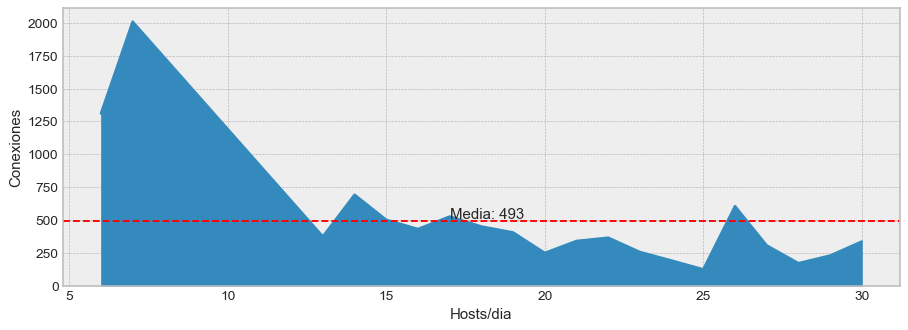

In [41]:
fig, axs = plt.subplots(figsize=(12, 4), dpi=90)
plt.style.use('bmh')
matlab_licencias.groupby([matlab_licencias.index.day])["Host"].count().plot(kind='area')
plt.text(17,509,'Media: 493',rotation=360)
plt.axhline(y=matlab_licencias.groupby([matlab_licencias.index.day])["Host"].count().mean(), color='red', ls='--', lw=1.5, label="Media conexiones por dia")
plt.xlabel("Hosts/dia");  
plt.ylabel("Conexiones");

In [ ]:
#Media hosts dia
matlab_licencias.groupby([matlab_licencias.index.day])["Host"].count().mean()

## Maple

In [42]:
maple = df_datos[df_datos['Producto'] == "maple"]

In [43]:
maple.head(5)

,Fecha,Hora,Server,Producto,Accion,Modulo,Usuario,Host
Datetime,,,,,,,,
2022-10-06 09:19:00,2022-06-10,9:19:00,flexlm01,maple,OUT,Maple,Usuario,PC3456367
2022-10-06 09:19:00,2022-06-10,9:19:00,flexlm01,maple,OUT,Maple2019,Usuario,PC3456367
2022-10-06 09:19:49,2022-06-10,9:19:49,flexlm01,maple,OUT,Maple,Usuario,PC3456367
2022-10-06 09:19:49,2022-06-10,9:19:49,flexlm01,maple,OUT,Maple2019,Usuario,PC3456367
2022-10-06 11:19:10,2022-06-10,11:19:10,flexlm01,maple,IN,Maple,Usuario,PC3456367


In [44]:
maple.tail(5)

,Fecha,Hora,Server,Producto,Accion,Modulo,Usuario,Host
Datetime,,,,,,,,
2022-05-07 15:53:38,2022-07-05,15:53:38,flexlm01,maple,IN,Maple2021,luquelj,CC24
2022-05-07 18:01:32,2022-07-05,18:01:32,flexlm01,maple,OUT,Maple,luquelj,CC04
2022-05-07 18:01:32,2022-07-05,18:01:32,flexlm01,maple,OUT,Maple2021,luquelj,CC04
2022-05-07 20:01:42,2022-07-05,20:01:42,flexlm01,maple,IN,Maple,luquelj,CC04
2022-05-07 20:01:42,2022-07-05,20:01:42,flexlm01,maple,IN,Maple2021,luquelj,CC04


In [45]:
maple['Modulo'].unique()

array(['Maple', 'Maple2019', 'Maple2021'], dtype=object)

In [ ]:
#Licencias utilizadas (OUT)
print(maple['Fecha'].min())
print(maple['Fecha'].max())
maple_licencias = maple[maple['Accion'] == "OUT"]
print("Suma licencia (out): {}".format(sum(maple_licencias.groupby('Modulo')['Accion'].count())))
print(maple_licencias.groupby('Modulo')['Accion'].count().sort_values())

In [46]:
#Hosts utilizando
print(maple['Fecha'].min())
print(maple['Fecha'].max())
print( "Total host unicos: {}".format(len(maple['Host'].unique())))
print( "Hosts: {}".format(maple['Host'].unique()))

2022-06-10 00:00:00
2022-07-05 00:00:00
Total host unicos: 30
Hosts: ['PC3456367' 'upm00128' 'a2pc29' 'aula203B24' 'upm00013' 'CCPERSONAL'
 'upm00107' 'upm00076' 'upm00139' 'upm00251' 'upm00271' 'DIB25' 'DIB11'
 'DIB03' 'DIB19' 'DIB17' 'DIB32' 'DIB27' 'DIB00' 'a8pc05' 'upm00473'
 'upm00476' 'upm00081' 'ccsup29' 'infor44' 'DESKTOP-PNPCIO6' 'Info324'
 'Info320' 'CC24' 'CC04']
